In [8]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from keras.utils.np_utils import to_categorical
from matplotlib import pyplot as plt


In [9]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print "Dimensions of Train data:", x_train.shape
print "Dimensions of Train label:", y_train.shape
print "Dimensions of Test data:", x_test.shape
print "Dimensions of Test label:", y_test.shape

Dimensions of Train data: (60000, 28, 28)
Dimensions of Train label: (60000,)
Dimensions of Test data: (10000, 28, 28)
Dimensions of Test label: (10000,)


In [10]:
x_train = x_train.reshape(x_train.shape[0],28*28)
x_test = x_test.reshape(x_test.shape[0],28*28)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train/255
x_test = x_test/255

y_train = to_categorical(y_train,num_classes = 10)
y_test = to_categorical(y_test,num_classes = 10)

print "Dimensions of Train data:", x_train.shape
print "Dimensions of in Test data:", x_test.shape
print "Dimensions of Train label:", y_train.shape
print "Dimensions of Test label:", y_test.shape

Dimensions of Train data: (60000, 784)
Dimensions of in Test data: (10000, 784)
Dimensions of Train label: (60000, 10)
Dimensions of Test label: (10000, 10)


In [11]:
model = Sequential()
model.add(Dense(28*28, activation = 'relu', use_bias = True, bias_initializer = 'zeros', input_shape = (28*28,)))
keras.layers.Dropout(0.05)
model.add(Dense(196, activation = 'relu', use_bias = True, bias_initializer = 'zeros'))
model.add(Dense(49, activation = 'relu', use_bias = True, bias_initializer = 'zeros'))
model.add(Dense(24, activation = 'relu', use_bias = True, bias_initializer = 'zeros'))
model.add(Dense(10, use_bias = True, bias_initializer = 'zeros', activation = 'softmax'))

In [12]:
ada = keras.optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.0)
model.compile(optimizer = ada, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [13]:
history = model.fit(x_train, y_train, batch_size = 32, epochs = 50, verbose = 1, validation_split = 0.2, shuffle = True)

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 118s 2ms/step - loss: 0.2396 - acc: 0.9270 - val_loss: 0.1208 - val_acc: 0.9648
Epoch 2/50
48000/48000 [==============================] - 87s 2ms/step - loss: 0.0865 - acc: 0.9739 - val_loss: 0.1052 - val_acc: 0.9692
Epoch 3/50
48000/48000 [==============================] - 92s 2ms/step - loss: 0.0563 - acc: 0.9834 - val_loss: 0.0849 - val_acc: 0.9731
Epoch 4/50
48000/48000 [==============================] - 98s 2ms/step - loss: 0.0395 - acc: 0.9887 - val_loss: 0.0832 - val_acc: 0.9754
Epoch 5/50
48000/48000 [==============================] - 93s 2ms/step - loss: 0.0276 - acc: 0.9922 - val_loss: 0.0829 - val_acc: 0.9746
Epoch 6/50
48000/48000 [==============================] - 104s 2ms/step - loss: 0.0196 - acc: 0.9952 - val_loss: 0.0813 - val_acc: 0.9774
Epoch 7/50
48000/48000 [==============================] - 100s 2ms/step - loss: 0.0137 - acc: 0.9970 - val_loss: 0.0811 - val_

In [14]:
print "Test Accuracy:",history.history['acc'][-1]*100,"%"
print "Validation Accuracy:",history.history['val_acc'][-1] * 100,"%"

Test Accuracy: 100.0 %
Validation Accuracy: 98.00833333333333 %


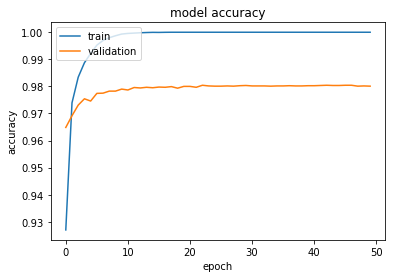

In [15]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

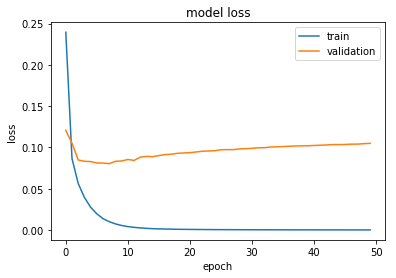

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [17]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 784)               615440    
_________________________________________________________________
dense_7 (Dense)              (None, 196)               153860    
_________________________________________________________________
dense_8 (Dense)              (None, 49)                9653      
_________________________________________________________________
dense_9 (Dense)              (None, 24)                1200      
_________________________________________________________________
dense_10 (Dense)             (None, 10)                250       
Total params: 780,403
Trainable params: 780,403
Non-trainable params: 0
_________________________________________________________________


In [18]:
eval = model.evaluate(x_test, y_test, verbose = 0)
print "Test Accuracy:", eval[1]*100,"%"


Test Accuracy: 98.34 %
